In [4]:
# Jupyter Notebook interativo com filtros e gráficos

import pandas as pd
import numpy as np
import json
import math
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

# Função para converter diversos formatos de dados em float
def to_float(val):
    if isinstance(val, (list, tuple)):
        for v in val:
            f = to_float(v)
            if not (pd.isna(f) or (isinstance(f, float) and math.isnan(f))):
                return f
        return np.nan
    if hasattr(val, '__iter__') and not isinstance(val, (str, bytes, int, float)):
        try:
            for v in val:
                f = to_float(v)
                if not (pd.isna(f) or (isinstance(f, float) and math.isnan(f))):
                    return f
        except TypeError:
            pass
    if pd.isna(val):
        return np.nan
    if isinstance(val, (int, float)):
        return float(val)
    if isinstance(val, str):
        try:
            return float(val.replace(',', '.'))
        except ValueError:
            txt = val.replace(',', '')
            m = re.search(r'-?\d+(?:\.\d+)?', txt)
            return float(m.group()) if m else np.nan
    return np.nan

# Caminho do arquivo JSON

data_path = r"g:\Meu Drive\mauro_projetos\seattle_lodging_projeto_final\seattle-lodging\data\dados_hospedagem.json"

if os.path.exists(data_path):
    with open(data_path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    if isinstance(raw, dict) and raw:
        df = pd.DataFrame(next(iter(raw.values())))
    elif isinstance(raw, list):
        df = pd.DataFrame(raw)
    else:
        df = pd.DataFrame()
else:
    print(f"Arquivo não encontrado: {data_path}")
    df = pd.DataFrame()

if not df.empty:
    money_cols = [c for c in ['preco', 'preco_noite', 'taxa_limpeza', 'taxa_deposito'] if c in df.columns]
    for col in money_cols:
        df[col] = df[col].apply(to_float)

    int_cols = [c for c in ['quantidade_quartos', 'quantidade_banheiros', 'quantidade_camas', 'max_hospedes'] if c in df.columns]
    for col in int_cols:
        df[col] = df[col].apply(to_float)

    if 'avaliacao_geral' in df.columns:
        df['avaliacao_geral'] = pd.to_numeric(df['avaliacao_geral'], errors='coerce')

    display(df.head())
    print("Correlação (Avaliação x Preço):")
    if 'avaliacao_geral' in df.columns and 'preco' in df.columns:
        df_corr = df[['avaliacao_geral', 'preco']].dropna()
        if df_corr.shape[0] > 1:
            correlation = df_corr['avaliacao_geral'].corr(df_corr['preco'])
            print(f"{correlation:.2f}")
        else:
            print("Dados insuficientes.")

    # Widgets interativos
    def update_plot(quartos):
        clear_output(wait=True)
        display(quartos_slider)
        df_filt = df[df['quantidade_quartos'] == quartos]
        plt.figure(figsize=(10, 5))
        sns.histplot(df_filt['preco'].dropna(), kde=True, bins=30)
        plt.title(f"Distribuição de Preço - {quartos} Quartos")
        plt.xlabel("Preço")
        plt.ylabel("Frequência")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    quartos_slider = widgets.IntSlider(
        value=1,
        min=int(df['quantidade_quartos'].min(skipna=True)),
        max=int(df['quantidade_quartos'].max(skipna=True)),
        step=1,
        description='Quartos:',
        continuous_update=False
    )

    widgets.interact(update_plot, quartos=quartos_slider)
else:
    print("DataFrame vazio. Corrija o carregamento do JSON.")


,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1.0,[This clean and comfortable one bedroom sits r...,[Lower Queen Anne is near the Seattle Center (...,1.0,1.0,1.0,"[Real Bed, Futon, Futon, Pull-out Sofa, Real B...","[{Internet,""Wireless Internet"",Kitchen,""Free P...",0.0,0.0,110.0
1,10.0,--,10.0,[Welcome to the heart of the 'Ballard Brewery ...,"[--, Capital Hill is the heart of Seattle, bor...",2.0,3.0,5.0,"[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...",500.0,125.0,350.0
2,10.0,--,11.0,[New modern house built in 2013. Spectacular ...,[Upper Queen Anne is a charming neighborhood f...,4.0,5.0,7.0,[Real Bed],"[{TV,""Cable TV"",Internet,""Wireless Internet"",""...",1000.0,300.0,975.0
3,10.0,--,12.0,[Our NW style home is 3200+ sq ft with 3 level...,[The Views from our top floor! Wallingford ha...,3.0,6.0,6.0,"[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{Internet,""Wireless Internet"",Kitchen,""Free P...",500.0,225.0,490.0
4,10.0,--,14.0,"[Perfect for groups. 2 bedrooms, full bathroom...",[Safeway grocery store within walking distance...,2.0,2.0,3.0,"[Real Bed, Real Bed]","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...",300.0,40.0,200.0


Correlação (Avaliação x Preço):
0.33


interactive(children=(IntSlider(value=1, continuous_update=False, description='Quartos:', max=6), Output()), _…

In [2]:
!pip install ipywidgets


   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 1.5 MB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.2 MB 1.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 1.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 2.1 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [widgetsnbextension]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/

IntSlider(value=1, continuous_update=False, description='Quartos:', max=6)

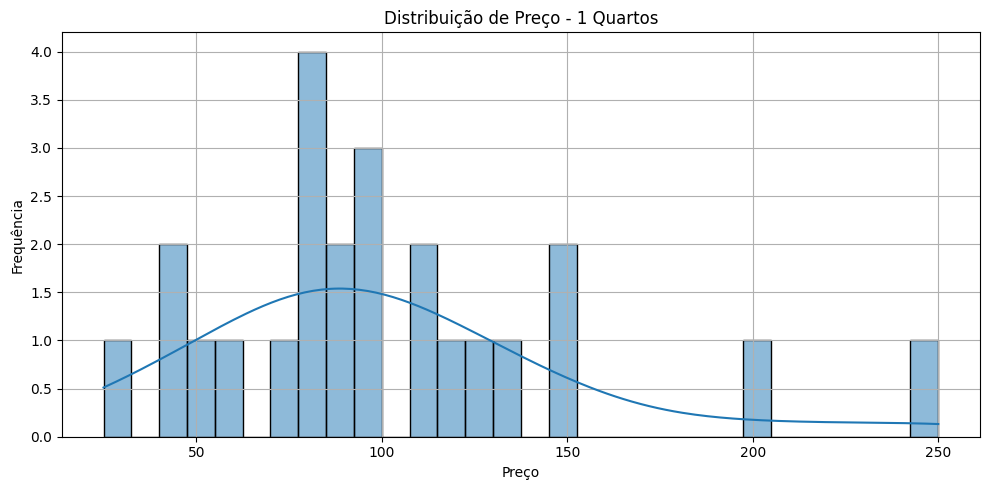

interactive(children=(IntSlider(value=1, continuous_update=False, description='Quartos:', max=6), Output()), _…

In [3]:
# Jupyter Notebook interativo com filtros e gráficos

import pandas as pd
import numpy as np
import json
import math
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

# Função para converter diversos formatos de dados em float
def to_float(val):
    if isinstance(val, (list, tuple)):
        for v in val:
            f = to_float(v)
            if not (pd.isna(f) or (isinstance(f, float) and math.isnan(f))):
                return f
        return np.nan
    if hasattr(val, '__iter__') and not isinstance(val, (str, bytes, int, float)):
        try:
            for v in val:
                f = to_float(v)
                if not (pd.isna(f) or (isinstance(f, float) and math.isnan(f))):
                    return f
        except TypeError:
            pass
    if pd.isna(val):
        return np.nan
    if isinstance(val, (int, float)):
        return float(val)
    if isinstance(val, str):
        try:
            return float(val.replace(',', '.'))
        except ValueError:
            txt = val.replace(',', '')
            m = re.search(r'-?\d+(?:\.\d+)?', txt)
            return float(m.group()) if m else np.nan
    return np.nan

# Caminho do arquivo JSON

data_path = r"g:\Meu Drive\mauro_projetos\seattle_lodging_projeto_final\seattle-lodging\data\dados_hospedagem.json"

if os.path.exists(data_path):
    with open(data_path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    if isinstance(raw, dict) and raw:
        df = pd.DataFrame(next(iter(raw.values())))
    elif isinstance(raw, list):
        df = pd.DataFrame(raw)
    else:
        df = pd.DataFrame()
else:
    print(f"Arquivo não encontrado: {data_path}")
    df = pd.DataFrame()

if not df.empty:
    money_cols = [c for c in ['preco', 'preco_noite', 'taxa_limpeza', 'taxa_deposito'] if c in df.columns]
    for col in money_cols:
        df[col] = df[col].apply(to_float)

    int_cols = [c for c in ['quantidade_quartos', 'quantidade_banheiros', 'quantidade_camas', 'max_hospedes'] if c in df.columns]
    for col in int_cols:
        df[col] = df[col].apply(to_float)

    if 'avaliacao_geral' in df.columns:
        df['avaliacao_geral'] = pd.to_numeric(df['avaliacao_geral'], errors='coerce')

    display(df.head())
    print("Correlação (Avaliação x Preço):")
    if 'avaliacao_geral' in df.columns and 'preco' in df.columns:
        df_corr = df[['avaliacao_geral', 'preco']].dropna()
        if df_corr.shape[0] > 1:
            correlation = df_corr['avaliacao_geral'].corr(df_corr['preco'])
            print(f"{correlation:.2f}")
        else:
            print("Dados insuficientes.")

    # Widgets interativos
    def update_plot(quartos):
        clear_output(wait=True)
        display(quartos_slider)
        df_filt = df[df['quantidade_quartos'] == quartos]
        plt.figure(figsize=(10, 5))
        sns.histplot(df_filt['preco'].dropna(), kde=True, bins=30)
        plt.title(f"Distribuição de Preço - {quartos} Quartos")
        plt.xlabel("Preço")
        plt.ylabel("Frequência")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    quartos_slider = widgets.IntSlider(
        value=1,
        min=int(df['quantidade_quartos'].min(skipna=True)),
        max=int(df['quantidade_quartos'].max(skipna=True)),
        step=1,
        description='Quartos:',
        continuous_update=False
    )

    widgets.interact(update_plot, quartos=quartos_slider)
else:
    print("DataFrame vazio. Corrija o carregamento do JSON.")
